In [1]:
! pip install stable_baselines3
! pip install Box2D

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [14]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [5]:
env = gym.make("CartPole-v1")
print(env.observation_space.shape[0])
print(env.action_space.n)

4
2


In [6]:
env = DummyVecEnv([lambda: env])

In [7]:
model = PPO('MlpPolicy', env, verbose = 1)

Using cuda device


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [8]:
model.learn(total_timesteps=20000)

-----------------------------
| time/              |      |
|    fps             | 573  |
|    iterations      | 1    |
|    time_elapsed    | 3    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 469         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009127199 |
|    clip_fraction        | 0.117       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.000951   |
|    learning_rate        | 0.0003      |
|    loss                 | 8.28        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0177     |
|    value_loss           | 55.4        |
-----------------------------------------
----------------------------------

In [17]:
num_episodes = 10
total_rewards = []

for episode in range(num_episodes):
    obs, _ = env.reset()
    episode_reward = 0
    done = False

    while not done:

        action, _ = model.predict(obs, deterministic=True)

        obs, reward, done, _, _ = env.step(action)

        episode_reward += reward

    total_rewards.append(episode_reward)
    print(f"Episode{episode + 1}: Reward = {episode_reward}")

mean_reward = np.mean(total_rewards)
std_reward = np.std(total_rewards)
print(f"Rewards of {num_episodes} Episodes: {mean_reward} ± {std_reward}")


Episode1: Reward = 993.0
Episode2: Reward = 688.0
Episode3: Reward = 2157.0
Episode4: Reward = 457.0
Episode5: Reward = 872.0
Episode6: Reward = 763.0
Episode7: Reward = 458.0
Episode8: Reward = 1397.0
Episode9: Reward = 1083.0
Episode10: Reward = 2008.0
Rewards of 10 Episodes: 1087.6 ± 565.7766697204826


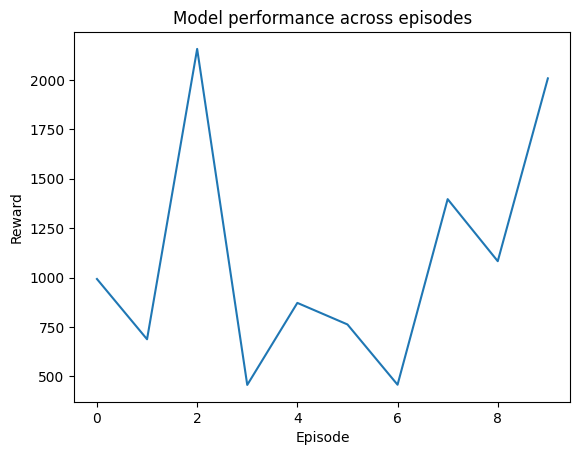

In [18]:
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Model performance across episodes')
plt.show()

In [ ]:
model.save('cartpole_model')